In [2]:
import sys

sys.path.append("../")

In [3]:
import torch
from torchvision.transforms import functional as TF
from torchvision.utils import make_grid

def plot_pairs(left_images, right_images):
    if not isinstance(left_images, list):
        left_images = [left_images]
    if not isinstance(right_images, list):
        right_images = [right_images]
    images = [torch.stack(image_pair) for image_pair in zip(left_images, right_images)]
    images = torch.cat(images)
    image_grid = make_grid(images, nrow=2)
    return TF.to_pil_image(image_grid)

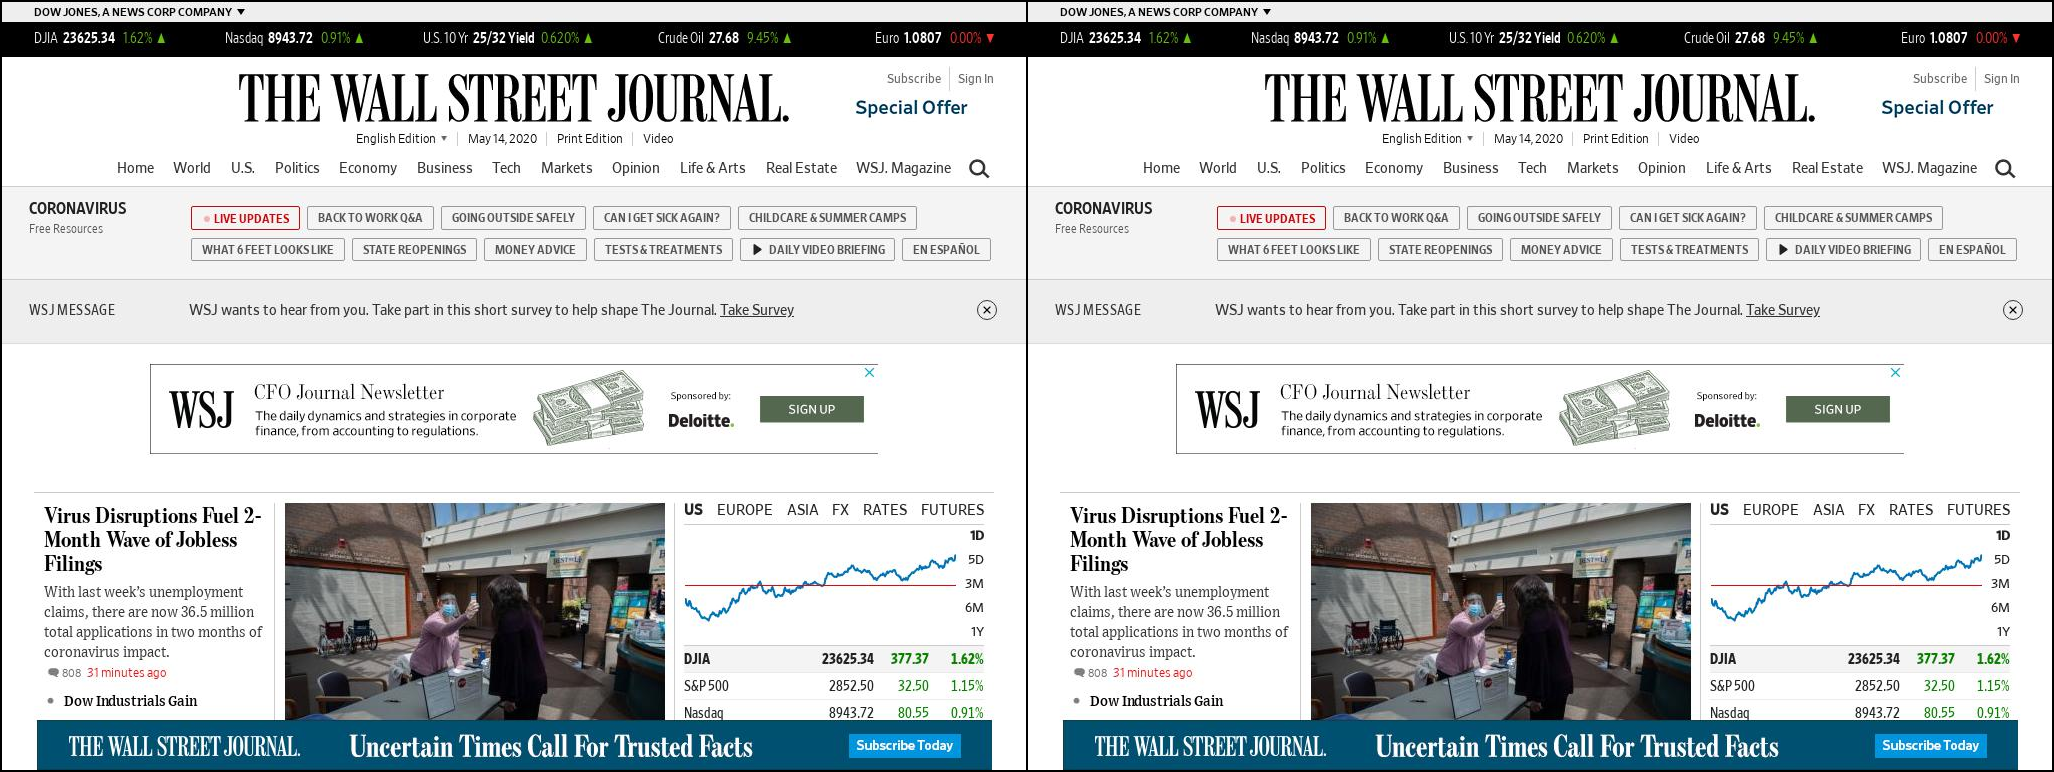

In [4]:
from torchvision import transforms as T
from src.datasets import Websites

transform = T.PILToTensor()
train_dataset = Websites(root="../data", split="train", transform=transform)
plot_pairs(*train_dataset[0])

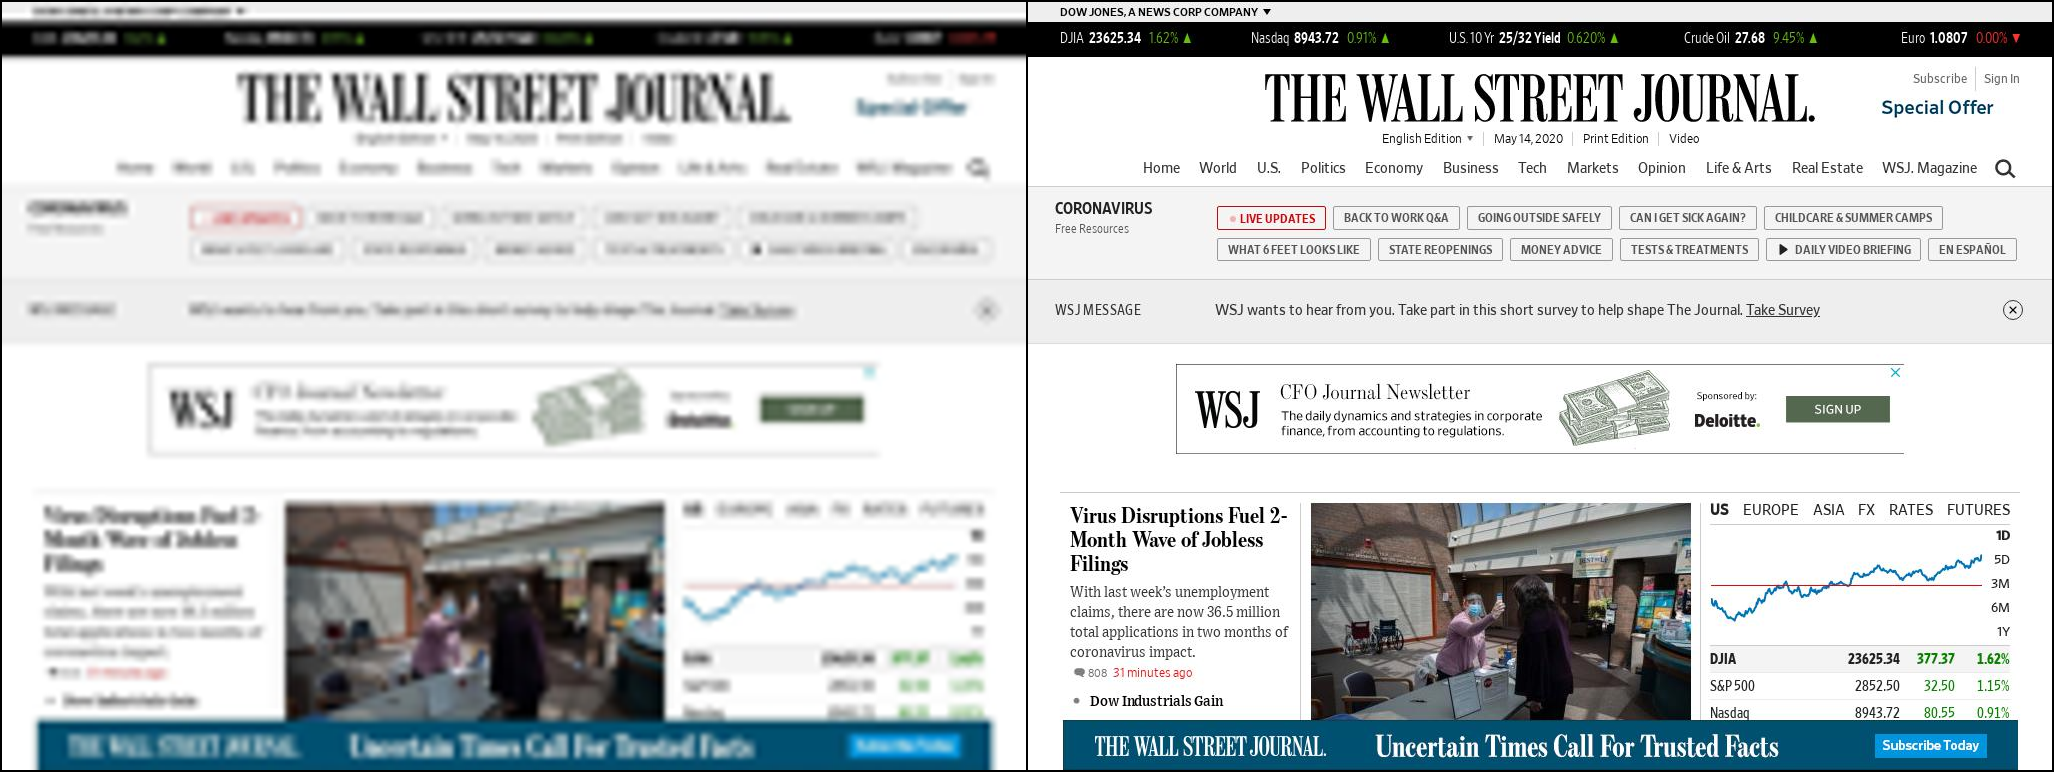

In [5]:
from src.utils import Downscale

FACTOR = 6
RESAMPLE = "bicubic"
downscaler = Downscale(FACTOR, RESAMPLE)
transform = T.PILToTensor()
train_dataset = Websites(root="../data", split="train", downscaler=downscaler, transform=transform)
plot_pairs(*train_dataset[0])

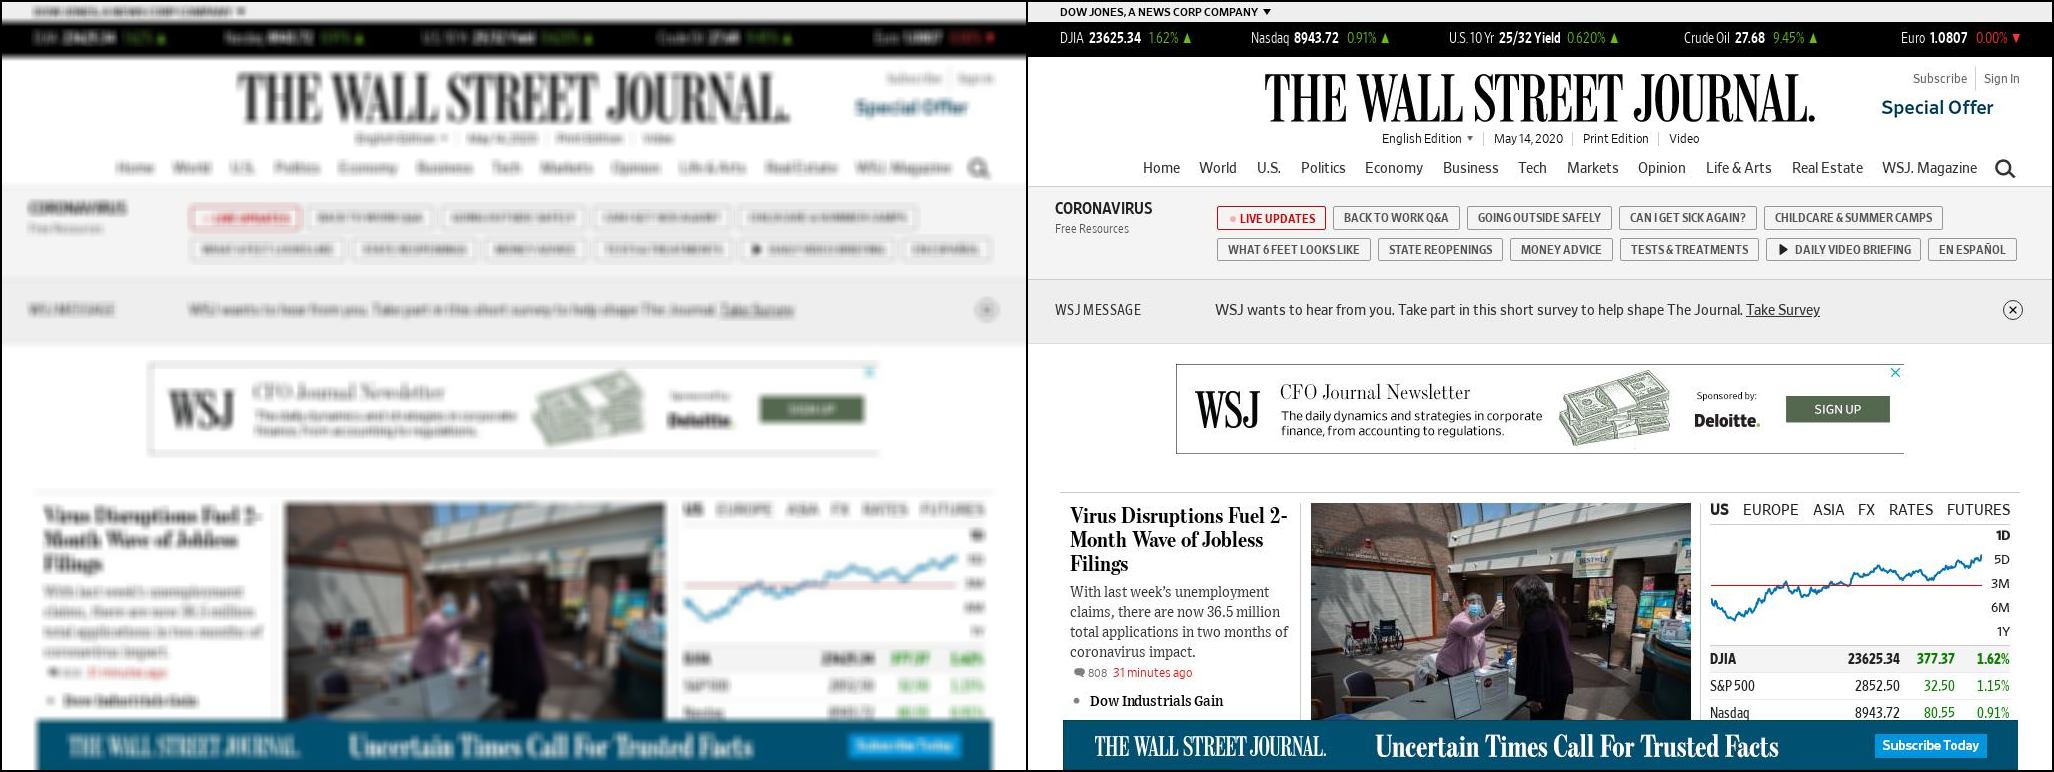

In [25]:
from src.utils import RandomBlur

KERNEL_SIZE = [1, 3, 5, 7, 9]
SIGMA = (0.1, 9.0)
downscaler = RandomBlur(KERNEL_SIZE, SIGMA)
transform = T.PILToTensor()
train_dataset = Websites(root="../data", split="train", downscaler=downscaler, transform=transform)
plot_pairs(*train_dataset[0])